<a href="https://colab.research.google.com/github/wipIpromise/c_lab01/blob/master/Lab1_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лаба 1, нейронные сети

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

1 Задание

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 444.3182 - root_mean_squared_error: 21.0789
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.9527 - root_mean_squared_error: 2.4398
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.6503 - root_mean_squared_error: 1.2846
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.6019 - root_mean_squared_error: 1.2656
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.5952 - root_mean_squared_error: 1.2630
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.5889 - root_mean_squared_error: 1.2605
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.5827 - root_mean_squared_error: 1.2581
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.5766 - root_mean_squared_error: 1.2556
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.5705 - root_mean_squared_error: 1.2532
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.5645 - root_mean_squared_error: 1.2508


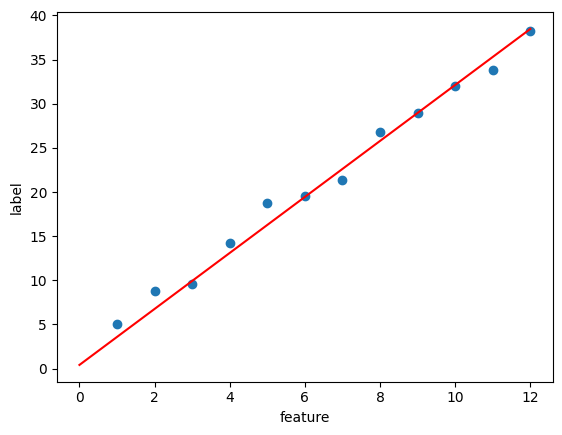

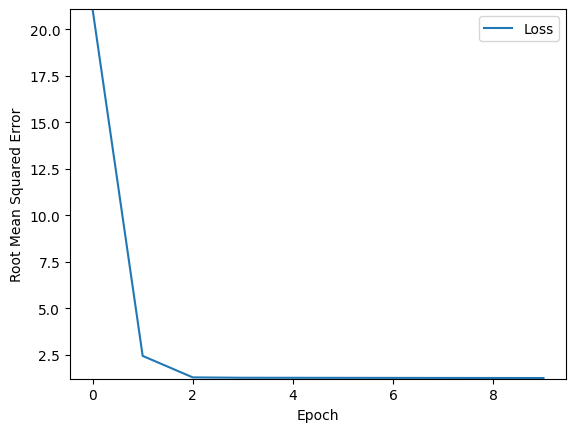

In [8]:
def build_model(rate):
    # Строим модель в виде последовательно подключаемых
    # слоев (промежуточные слои соединяются автоматом).
    model = tf.keras.models.Sequential()
    # В нашем случае в виде одного слоя из
    # одного единственного нейрона:
    model.add(tf.keras.layers.Dense(units=1, # количество нейронов
    input_shape=(1,))) # размерность входов
    # Скомпилируем нашу модель в код, который исполнит
    # TensorFlow. В качестве функции потерь, которую
    # мы будем минимизировать, выберем среднеквадратическую ошибку
    model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=rate),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature, # входные данные ("признаки")
    y=label, # выходные дынные ("метки")
    batch_size=batch_size, # размер пакета
    # данных для одной эпохи градиетного спуска
    epochs=epochs) # общее число эпох обучения
    # Сохраняем итоговые веса нейрона в отдельные переменные
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    # Отдельно сохраним список эпох обучения
    epochs = history.epoch
    # Преобразуем данные к формату Pandas.DataFrame
    hist = pd.DataFrame(history.history)
    # Сохраним данные о среднеквадратической ошибке
    rmse = hist["root_mean_squared_error"]
    # ---------
    return trained_weight, trained_bias, epochs, rmse

def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel("feature")
    plt.ylabel("label")
    # входные данные по оси x, выходные по оси y
    plt.scatter(feature, label)
    # Модель линейной регрессии будет представлена красной линией
    # с началом в (x0, y0) и концом в (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c="r")
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

features = np.array([1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,10.0,11.0,12.0])
labels = np.array([5.0,8.8, 9.6,14.2,18.8,19.5,21.4,26.8,28.9,32.0,33.8,38.2])


learning_rate=0.01 # выберем малую скорость обучения
epochs=10 # возьмем небольшое число эпох для обучения
my_batch_size=12 # задействуем все обучающие примеры за одну эпоху обучения.
my_feature =  features
my_label = labels

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, features, labels, epochs, my_batch_size)
plot_the_model(trained_weight[0][0], trained_bias[0], my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

2 Задание

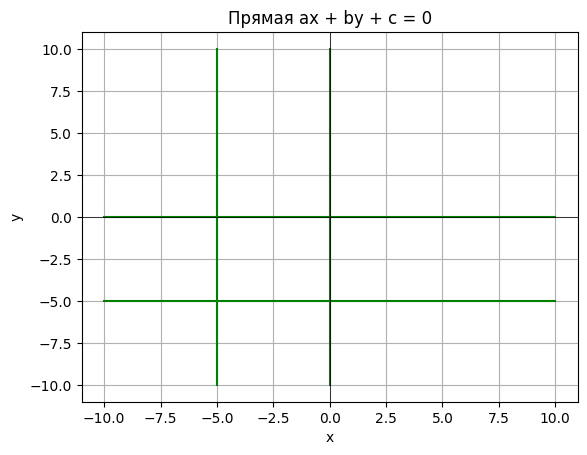

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def make_line(a, b, c):
    if abs(b) > 1e-12:
        x = np.linspace(-10, 10, 400)
        y = (-a*x - c)/b
    else:
        x = np.full(400, -c/a)
        y = np.linspace(-10, 10, 400)

    return x, y

xl1, yl1 = make_line(0., 1., 0.)
plt.plot(xl1, yl1, '-g')

xl2, yl2 = make_line(1., 0., 0.)
plt.plot(xl2, yl2, '-g')

xl3, yl3 = make_line(0., 1., 5.)
plt.plot(xl3, yl3, '-g')

xl4, yl4 = make_line(1., 0., 5.)
plt.plot(xl4, yl4, '-g')

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Прямая ax + by + c = 0')
plt.show()


#закраска областей
def season(month):
    match month:
        case 12 | 1 | 2:
            return "Зима"
        case 3 | 4 | 5:
            return "Весна"
        case 6 | 7 | 8:
            return "Лето"
        case 9 | 10 | 11:
            return "Осень"
        case _:
            return "Неизвестно"

def distance_point_to_line(px, py, x1, y1, x2, y2):
    """
    Возвращает расстояние (минимальное отклонение) точки (px, py) от прямой,
    проходящей через точки (x1, y1) и (x2, y2).
    Если x1,y1 == x2,y2 (прямая не определена), возвращает расстояние до точки (x1,y1).
    """
    # вектор направления линии
    dx = x2 - x1
    dy = y2 - y1
    if dx == 0 and dy == 0:
        # линия вырожденная — точка
        return ((px - x1)**2 + (py - y1)**2)**0.5
    # коэффициенты прямой Ax + By + C = 0
    A = dy
    B = -dx
    C = dx * y1 - dy * x1
    # расстояние по формуле |A*x0 + B*y0 + C| / sqrt(A^2 + B^2)
    return abs(A * px + B * py + C) / (A*A + B*B)**0.5
